In [ ]:
"""" 
test plot RTOFS data (which is used to force RTOFS) under smb://mule/disk3/projects/tc2022/
named like:
/mule/tc2022/RTOFS/study_area
    /mule/tc2022/tc2023/RTOFS/study_area
    /mule/tc2022/tc2024/RTOFS/study_area
    /mule/tc2022/RTOFS/study_area
    ocean u, v velocities are in the daily files with names like surface.now.20221102.nc
    "now" signifies analysis data in this case, as opposed to forecasted data.

Can aggregate these files to produce hourly momentum flux and surface ocean current data that offers
a chance to evaluate wind work on currents at the GFS and RTOFS horizontal scales 
(~ 12km for GFS/ 0.117 deg)(~8 km for RTFS/ 0.08 deg)
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [5]:
datestr = '20230907'
path = '/Volumes/disk3/projects/tc2022/tc2023/RTOFS/study_area/'
filenames_all = np.sort( os.listdir(path) )
filenames = np.array([])
for file in filenames_all:
    if ('.nc' in file) & ('now' in file):
        filenames = np.append(filenames, file)
print(len(filenames), filenames)

235 ['subsurface.now.20230726.nc' 'subsurface.now.20230727.nc'
 'subsurface.now.20230728.nc' 'subsurface.now.20230729.nc'
 'subsurface.now.20230730.nc' 'subsurface.now.20230731.nc'
 'subsurface.now.20230801.nc' 'subsurface.now.20230802.nc'
 'subsurface.now.20230803.nc' 'subsurface.now.20230804.nc'
 'subsurface.now.20230805.nc' 'subsurface.now.20230806.nc'
 'subsurface.now.20230807.nc' 'subsurface.now.20230808.nc'
 'subsurface.now.20230809.nc' 'subsurface.now.20230810.nc'
 'subsurface.now.20230811.nc' 'subsurface.now.20230812.nc'
 'subsurface.now.20230813.nc' 'subsurface.now.20230814.nc'
 'subsurface.now.20230815.nc' 'subsurface.now.20230816.nc'
 'subsurface.now.20230817.nc' 'subsurface.now.20230818.nc'
 'subsurface.now.20230819.nc' 'subsurface.now.20230820.nc'
 'subsurface.now.20230821.nc' 'subsurface.now.20230822.nc'
 'subsurface.now.20230823.nc' 'subsurface.now.20230825.nc'
 'subsurface.now.20230826.nc' 'subsurface.now.20230827.nc'
 'subsurface.now.20230828.nc' 'subsurface.now.202308

In [14]:
"Read RTOFS now (analysis) data"
ds = nc.Dataset(path+'surface.now.'+datestr+'.nc')
str_vars = ['MT','LAYER','LONGITUDE','LATITUDE','U_VELOCITY','V_VELOCITY','MIXED_LAYER_THICKNESS']
""" 
  	MT:units = "days since 1900-12-31 00:00:00" ;
    U_VELOCITY:_FillValue = 1.267651e+30f ;
	U_VELOCITY:units = "m/s" ;
    MIXED_LAYER_THICKNESS:_FillValue = 1.267651e+30f ;
	MIXED_LAYER_THICKNESS:units = "m" ;
"""
for str_var_i in str_vars:
    temp = ds.variables[str_var_i][:]
    str_exec = str_var_i+'= temp'
    exec(str_exec)
dtime = np.array([datetime.datetime(1900,12,31)+datetime.timedelta(days=dt) for dt in MT])
print(dtime[0:3],dtime[-1])
print('lon shape:',LONGITUDE.shape, '. U_VELOCITY:',U_VELOCITY.shape)
print('min-max of lon/ lat:',np.min(LONGITUDE),'-',np.max(LONGITUDE),np.min(LATITUDE),'-',np.max(LATITUDE))
LONGITUDE[LONGITUDE>180] = LONGITUDE[LONGITUDE>180]-360
print('min-max of lon/ lat:',np.min(LONGITUDE),'-',np.max(LONGITUDE),np.min(LATITUDE),'-',np.max(LATITUDE))
print(LAYER)

[datetime.datetime(2023, 9, 6, 0, 0) datetime.datetime(2023, 9, 6, 1, 0)
 datetime.datetime(2023, 9, 6, 2, 0)] 2023-09-06 23:00:00
lon shape: (551, 901) . U_VELOCITY: (24, 1, 551, 901)
min-max of lon/ lat: 258.07996 - 330.07996 7.577811 - 45.773247
min-max of lon/ lat: -101.920044 - -29.920044 7.577811 - 45.773247
[1]


In [10]:
print('min-max of lon/ lat:',np.min(LONGITUDE),'-',np.max(LONGITUDE),np.min(LATITUDE),'-',np.max(LATITUDE))

min-max of lon/ lat: -101.920044 - -29.920044 7.577811 - 45.773247


In [11]:
### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_24_Jul_2024/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n35.0_s5.0_w-92.0_e-50.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )
ilon = np.where( (lon_topo>= np.min(LONGITUDE)) & (lon_topo<= np.max(LONGITUDE)) )[0]
ilat = np.where( (lat_topo>= np.min(LATITUDE)) & (lat_topo<= np.max(LATITUDE)) )[0]
print(lon_topo[ilon].shape, lat_topo[ilat].shape, elevation[np.ix_(ilat,ilon)].shape )

(10080,) (7200,) (7200, 10080)
(10080,) (6581,) (6581, 10080)


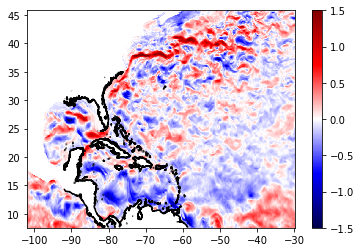

In [13]:
plt.pcolormesh(LONGITUDE,LATITUDE,np.squeeze(U_VELOCITY[0,0,:,:]),cmap='seismic',vmin=-1.5,vmax=1.5)
plt.colorbar()
plt.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)],colors='k',levels=0)

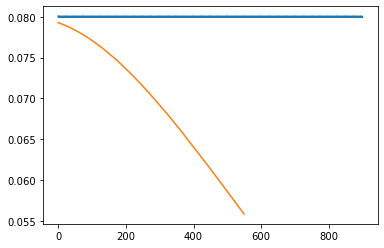

In [23]:
plt.plot(np.diff(LONGITUDE[0,:]))
plt.plot(np.diff(LATITUDE[:,0]))